# Project: Wrangling and Analyze Data

## Context
Your goal: wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for "Wow!"-worthy analyses and visualizations.

## Notebook setup
Set up libraries we will use within the Notebook

In [70]:
# Import libraries
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import matplotlib.pyplot as plt

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [71]:
# Manually download the data from https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv
# Manually use 'Upload' button in Jupyter Notebook dashboard to import

# Now that the file has been uploaded,read in the csv file 'twitter-archive-enhanced.csv'
filename = 'twitter-archive-enhanced.csv'
twitter_archive_df = pd.read_csv(filename)

# Quick check on dataframe
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [72]:
# Set url path for the file to download and then download the file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open ('image-predictions.tsv', mode='wb') as file :
    file.write(response.content)

# Create dataframe from the tsv file using read_csv
image_predictions_df = pd.read_csv('image-predictions.tsv', sep= '\t')

# Quick check on dataframe
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [73]:
# Establish connection to Twitter API using Tweey
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify=True, parser=tweepy.parsers.JSONParser())

In [74]:
# Test the connection and develop using five tweet_id examples (to support coding approach and work around API rate limit)
twitter_archive_5_df = twitter_archive_df.head(5)

with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in twitter_archive_5_df.tweet_id:
        try:
            tweet = api.get_status(tweet_id, tweet_mode = 'extended')

            # Write the data to the json file 'tweet_json.txt' as required
            outfile.write(json.dumps(tweet)+'\n')
            
        # Print the tweet for sense check that it is running
            print(tweet)
        except: # No tweet available
            print(str(tweet_id) + " deleted from Twitter")

# This approach works, scale in the next cell

In [75]:
# Use a try-except block with the twitter API data to pull through all of the twitter data that we need in a for loop
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in twitter_archive_df.tweet_id:
        try:
            tweet = api.get_status(tweet_id, tweet_mode = 'extended')

            # Write the data to the json file 'tweet_json.txt' as required
            outfile.write(json.dumps(tweet)+'\n')
            
        # Print the tweet for sense check that it is running
            print(tweet)
        except: # No tweet available
            print(str(tweet_id) + " deleted from Twitter")

In [76]:
# Create an empty list which we will populate with the data we need line by line
tweet_in_list = []

# Read in the json file to a dataframe
with open ('tweet_json.txt', 'r') as infile:
    for tweet in infile:
        line = json.loads(tweet)
        tweet_in_list.append({"tweet_id": line["id"],
                             "retweet_count": line["retweet_count"],
                             "favorite_count": line["favorite_count"],
                             "entities": line["entities"],#["media"]
                             "created_at": line["created_at"]
                             })

In [77]:
tweet_in_list[0:5]

[{'tweet_id': 892420643555336193,
  'retweet_count': 7184,
  'favorite_count': 34519,
  'entities': {'hashtags': [],
   'symbols': [],
   'user_mentions': [],
   'urls': [],
   'media': [{'id': 892420639486877696,
     'id_str': '892420639486877696',
     'indices': [86, 109],
     'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'url': 'https://t.co/MgUWQ76dJU',
     'display_url': 'pic.twitter.com/MgUWQ76dJU',
     'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
     'type': 'photo',
     'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
      'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
      'small': {'w': 540, 'h': 528, 'resize': 'fit'},
      'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]},
  'created_at': 'Tue Aug 01 16:23:56 +0000 2017'},
 {'tweet_id': 892177421306343426,
  'retweet_count': 5394,
  'favorite_count': 29931,
  'entities'

In [78]:
# Convert the list to a dataframe
tweepy_df = pd.DataFrame(tweet_in_list)

In [79]:
# Quick check on the dataframe
tweepy_df.head()

,created_at,entities,favorite_count,retweet_count,tweet_id
0,Tue Aug 01 16:23:56 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXo...",34519,7184,892420643555336193
1,Tue Aug 01 00:17:27 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4X...",29931,5394,892177421306343426
2,Mon Jul 31 00:18:03 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [122, 145], 'media_url': 'http://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGBdLU1W...",22519,3560,891815181378084864
3,Sun Jul 30 15:58:51 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891689552724799489, 'id_str': '891689552724799489', 'indices': [80, 103], 'media_url': 'http://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DF_q7IAWs...",37763,7410,891689557279858688
4,Sat Jul 29 16:00:24 +0000 2017,"{'hashtags': [{'text': 'BarkWeek', 'indices': [129, 138]}], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891327551943041024, 'id_str': '891327551943041024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DF6hr6AVYAAZ8G8.jpg', 'media_url_ht...",36049,7944,891327558926688256


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Visual assessment

#### 1. twitter_archive_df dataframe

In [80]:
# Take a look at the twitter_archive_df dataframe to visually inspect (sort by tweet_id to allow comparisons between dataframes)
twitter_archive_df.sort_values('tweet_id')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758794694657/photo/1,10,10,a,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853826850816/photo/1,2,10,an,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a Siberian heavily armored polar bear mix. Strong owner. 10/10 I would do unspeakable things to pet this dog https://t.co/rdivxLiqEt,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525042405380/photo/1,10,10,a,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",My oh my. This is a rare blond Canadian terrier on wheels. Only $8.98. Rather docile. 9/10 very rare https://t.co/yWBqbrzy8O,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090499244032/photo/1,9,10,a,None,None,None,None
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol rad). 8/10 good dog https://t.co/pYAJkAe76p,NaN,NaN,NaN,https://tw

#### 2. image_predictions_df dataframe

In [81]:
# Take a look at the image_predictions_df dataframe to visually inspect (sort by tweet_id to allow comparisons between dataframes)
image_predictions_df.sort_values('tweet_id')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


#### 3. tweepy_df dataframe

In [82]:
# Take a look at the tweepy_df dataframe to visually inspect (sort by tweet_id to allow comparisons between dataframes)
tweepy_df.sort_values('tweet_id')

,created_at,entities,favorite_count,retweet_count,tweet_id
2327,Sun Nov 15 22:32:08 +0000 2015,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 666020881337073664, 'id_str': '666020881337073664', 'indices': [108, 131], 'media_url': 'http://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CT4udn0W...",2319,436,666020888022790149
2326,Sun Nov 15 23:05:30 +0000 2015,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 666029276303482880, 'id_str': '666029276303482880', 'indices': [116, 139], 'media_url': 'http://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CT42GRgU...",116,40,666029285002620928
2325,Sun Nov 15 23:21:54 +0000 2015,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 666033409081393153, 'id_str': '666033409081393153', 'indices': [107, 130], 'media_url': 'http://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CT4521TW...",102,37,666033412701032449
2324,Mon Nov 16 00:04:52 +0000 2015,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 666044217047650304, 'id_str': '666044217047650304', 'indices': [114, 137], 'media_url': 'http://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CT5Dr8HU...",252,118,666044226329800704
2323,Mon Nov 16 00:24:50 +0000 2015,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 666049244999131136, 'id_str': '666049244999131136', 'indices': [97, 120], 'media_url': 'http://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CT5IQmsXI...",92,37,666049248165822465
2322,Mon Nov 16 00:30:50 +0000 2015,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 666050754986266625, 'id_str': '666050754986266625', 'indices': [117, 140], 'media_url': 'http://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CT5Jof1W...",118,51,666050758794694657
2321,Mon Nov 16 00:35:11 +0000 2015,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 666051848592334848, 'id_str': '666051848592334848', 'indices': [115, 138], 'media_url': 'http://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CT5KoJ1W...",1054,728,666051853826850816
2320,Mon Nov 16 00:49:46 +0000 2015,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 666055517517848576, 'id_str': '666055517517848576', 'indices': [117, 140], 'media_url': 'http://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CT5N9tpX...",386,204,666055525042405380
2319,Mon Nov 16 00:55:59 +0000 2015,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 666057085227016192, 'id_str': '666057085227016192', 'indices': [101, 124], 'media_url': 'http://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CT5PY90W...",257,114,666057090499244032
2318,Mon Nov 16 01:01:59 +0000 2015,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 666058597072306176, 'id_str': '666058597072306176', 'indices': [112, 135], 'media_url': 'http://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CT5Qw94X...",102,49,666058600524156928


### Programatic assessment

#### 1. twitter_archive_df dataframe

In [83]:
twitter_archive_df.info()
# There are formatting issues with timestamps

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [84]:
# Check a sample of records
twitter_archive_df.sample(25)
# Some dog names entirely in lower case

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2175,669214165781868544,NaN,NaN,2015-11-24 18:01:05 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jaspers. He is a northeastern Gillette. Just got his license. Very excited. 10/10 they grow up so fast https://t.co/cieaOI0RuT,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669214165781868544/photo/1,10,10,Jaspers,None,None,None,None
1378,701570477911896070,NaN,NaN,2016-02-22 00:53:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Yoda. He's a Zimbabwean Rutabaga. Freaks out if u stop scratching his belly. Incredibly self-centered. 9/10 https://t.co/yVdMsVYHIx,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/701570477911896070/photo/1,https://twitter.com/dog_rates/status/701570477911896070/photo/1",9,10,Yoda,None,None,None,None
986,749064354620928000,NaN,NaN,2016-07-02 02:17:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Winston. He's pupset because I forgot to mention that it's Canada Day today. 11/10 please forgive me Winston https://t.co/xEY8dbJxnF,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/749064354620928000/photo/1,https://twitter.com/dog_rates/status/749064354620928000/photo/1",11,10,Winston,None,None,None,None
865,762316489655476224,NaN,NaN,2016-08-07 15:56:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Scout. He specializes in mid-air freeze frames. 11/10 https://t.co/sAHmwRtfSq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/762316489655476224/photo/1,11,10,Scout,None,None,None,None
143,864197398364647424,NaN,NaN,2017-05-15 19:14:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Paisley. She ate a flower just to prove she could. Savage af. 13/10 would pet so well https://t.co/cPq9fYvkzr,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/864197398364647424/photo/1,https://twitter.com/dog_rates/status/864197398364647424/photo/1,https://twitter.com/dog_rates/status/864197398364647424/photo/1,https://twitter.com/dog_rates/status/864197398364647424/photo/1",13,10,Paisley,None,None,None,None
2204,668636665813057536,NaN,NaN,2015-11-23 03:46:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Irish Rigatoni terrier named Berta. Completely made of rope. No eyes. Quite large. Loves to dance. 10/10 https://t.co/EM5fDykrJg,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668636665813057536/photo/1,10,10,an,None,None,None,None
1924,674075285688614912,NaN,NaN,2015-12-08 03:57:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Mitch. He thinks that's a hat. Nobody has told him yet. 11/10 please no one tell him https://t.co/7jOPktauh4,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674075285688614912/photo/1,11,10,Mitch,None,None,None,None
1760,678708137298427904,NaN,NaN,2015-12-20 22:46:44 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Here we are witnessing a wild field pupper. Lost his wallet in there. Rather unfortunate. 10/10 good luck pup https://t.co/sZy9Co74Bw,NaN,NaN,NaN,https://vine.co/v/eQjxxYaQ60K,10,10,None,None,None,pupper,None
27,886736880519319552,NaN,NaN,2017-07-16 23:58:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Mingus. He's a wonderful father to his smol pup. Confirmed 13/10, but he needs your help\n\nhttps://t.co/bVi0Yr4Cff https://t.co/ISvKOSkd5b",NaN,NaN,NaN,"https://www.gofundme.com/mingusneedsus,https://twitter.com/dog_rates/status/886736880519319552/photo/1,https://twitter.com/dog_rates/status

In [85]:
# Check the expanded urls in more detail given that we have only 2297 records populated compared to 2356 for other fields
twitter_archive_df[twitter_archive_df.expanded_urls.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10",NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Jenna_Marbles: @dog_rates Thanks for rating my cermets 14/10 wow I'm so proud I watered them so much,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@xianmcguire @Jenna_Marbles Kardashians wouldn't be famous if as a society we didn't place enormous value on what they do. The dogs are very deserving of their 14/10,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [86]:
twitter_archive_df[twitter_archive_df.expanded_urls.isnull()].count()

tweet_id                      59
in_reply_to_status_id         55
in_reply_to_user_id           55
timestamp                     59
source                        59
text                          59
retweeted_status_id            1
retweeted_status_user_id       1
retweeted_status_timestamp     1
expanded_urls                  0
rating_numerator              59
rating_denominator            59
name                          59
doggo                         59
floofer                       59
pupper                        59
puppo                         59
dtype: int64

In [87]:
# Check the denominators
twitter_archive_df.rating_denominator.value_counts()

# Review the full text on those which are not 10
twitter_archive_df[twitter_archive_df.rating_denominator != 10].sort_values('rating_denominator')
# There are records where incorrect text has been included as a rating

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1,2,an,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037429899265/photo/1,7,11,Darrel,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
1663,682808988178739200,6.827884e+17,4.196984e+09,2016-01-01 06:22:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible",NaN,NaN,NaN,NaN,20,16,None,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1598,686035780142297088,6.860340e+17,4.196984e+09,2016-01-10 04:04:10 +0000,"

In [88]:
# Check that the retweeted_status_id records are retweets (we can see that they are based on the RT at the start of the tweet text)
retweets = twitter_archive_df[twitter_archive_df.retweeted_status_id.notnull()]
retweets.count()
# We have 181 reweets

tweet_id                      181
in_reply_to_status_id           0
in_reply_to_user_id             0
timestamp                     181
source                        181
text                          181
retweeted_status_id           181
retweeted_status_user_id      181
retweeted_status_timestamp    181
expanded_urls                 180
rating_numerator              181
rating_denominator            181
name                          181
doggo                         181
floofer                       181
pupper                        181
puppo                         181
dtype: int64

In [89]:
# Check that the replyto records are also not original tweets
replyto = twitter_archive_df[twitter_archive_df.in_reply_to_status_id.notnull()]
replyto.count()
# We have 78 replies

tweet_id                      78
in_reply_to_status_id         78
in_reply_to_user_id           78
timestamp                     78
source                        78
text                          78
retweeted_status_id            0
retweeted_status_user_id       0
retweeted_status_timestamp     0
expanded_urls                 23
rating_numerator              78
rating_denominator            78
name                          78
doggo                         78
floofer                       78
pupper                        78
puppo                         78
dtype: int64

In [90]:
twitter_archive_df.name.value_counts()

None            745
a                55
Charlie          12
Oliver           11
Lucy             11
Cooper           11
Penny            10
Lola             10
Tucker           10
Bo                9
Winston           9
the               8
Sadie             8
Toby              7
Buddy             7
Bailey            7
Daisy             7
an                7
Koda              6
Bella             6
Rusty             6
Stanley           6
Dave              6
Milo              6
Scout             6
Jack              6
Oscar             6
Jax               6
Leo               6
Gus               5
               ... 
Kial              1
Willy             1
Emma              1
Swagger           1
Bonaparte         1
Craig             1
Kulet             1
Fillup            1
Noah              1
Alexanderson      1
Banjo             1
Rorie             1
Mo                1
Dex               1
Snoop             1
Arlo              1
Stefan            1
Bobbay            1
Tom               1


#### 2. image_predictions_df dataframe

In [91]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [92]:
image_predictions_df.sample(25)
# img_num does not correspond to the image with the most confident prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1350,759793422261743616,https://pbs.twimg.com/media/CotUFZEWcAA2Pku.jpg,2,golden_retriever,0.985876,True,Labrador_retriever,0.001948,True,kuvasz,0.001752,True
63,667165590075940865,https://pbs.twimg.com/media/CUI_kHBWsAAAef5.jpg,1,miniature_pinscher,0.140173,True,Rottweiler,0.134094,True,beagle,0.081900,True
2036,884441805382717440,https://pbs.twimg.com/media/DEYrIZwWsAA2Wo5.jpg,1,Pembroke,0.993225,True,Cardigan,0.003216,True,Chihuahua,0.002081,True
1258,748692773788876800,https://pbs.twimg.com/media/CmPkGhFXEAABO1n.jpg,1,ox,0.337871,False,plow,0.269287,False,oxcart,0.245653,False
1525,788412144018661376,https://pbs.twimg.com/media/CvEAqQoWgAADj5K.jpg,1,golden_retriever,0.805238,True,Labrador_retriever,0.113798,True,Brittany_spaniel,0.038559,True
1139,729463711119904772,https://pbs.twimg.com/media/Ch-TXpFXAAAwPGf.jpg,1,German_shepherd,0.829307,True,Doberman,0.022500,True,basenji,0.021190,True
955,705239209544720384,https://pbs.twimg.com/media/CcmDUjFW8AAqAjc.jpg,1,Chihuahua,0.157950,True,toy_terrier,0.089920,True,Mexican_hairless,0.063225,True
1091,719367763014393856,https://pbs.twimg.com/media/Cfu1KSRXEAACC5X.jpg,1,swing,0.171486,False,soft-coated_wheaten_terrier,0.050971,True,Tibetan_terrier,0.047759,True
1480,780858289093574656,https://pbs.twimg.com/media/CtYqeNHWgAATqYZ.jpg,1,Chesapeake_Bay_retriever,0.488555,True,Sussex_spaniel,0.271655,True,kelpie,0.106913,True
2025,881906580714921986,https://pbs.twimg.com/media/DD0pWm9XcAAeSBL.jpg,1,Weimaraner,0.291539,True,Chesapeake_Bay_retriever,0.278966,True,koala,0.127017,False


In [93]:
image_predictions_df.p1.value_counts()
# Inconsistent naming of dogs with some in capitals and some not.  We also have underscores '_' which should probably be replaced with spaces

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Siberian_husky                20
Staffordshire_bullterrier     20
German_shepherd               20
web_site                      19
Cardigan                      19
Eskimo_dog                    18
Shetland_sheepdog             18
teddy                         18
Maltese_dog                   18
beagle                        18
Lakeland_terrier              17
Rottweiler                    17
Shih-Tzu                      17
kuvasz                        16
Italian_greyhound             16
          

#### 3. tweepy_df dataframe

In [94]:
tweepy_df.sort_values('tweet_id').info(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2328 entries, 2327 to 0
Data columns (total 5 columns):
created_at        2328 non-null object
entities          2328 non-null object
favorite_count    2328 non-null int64
retweet_count     2328 non-null int64
tweet_id          2328 non-null int64
dtypes: int64(3), object(2)
memory usage: 109.1+ KB


In [95]:
tweepy_df.head(5)

,created_at,entities,favorite_count,retweet_count,tweet_id
0,Tue Aug 01 16:23:56 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXo...",34519,7184,892420643555336193
1,Tue Aug 01 00:17:27 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4X...",29931,5394,892177421306343426
2,Mon Jul 31 00:18:03 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [122, 145], 'media_url': 'http://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGBdLU1W...",22519,3560,891815181378084864
3,Sun Jul 30 15:58:51 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891689552724799489, 'id_str': '891689552724799489', 'indices': [80, 103], 'media_url': 'http://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DF_q7IAWs...",37763,7410,891689557279858688
4,Sat Jul 29 16:00:24 +0000 2017,"{'hashtags': [{'text': 'BarkWeek', 'indices': [129, 138]}], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891327551943041024, 'id_str': '891327551943041024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DF6hr6AVYAAZ8G8.jpg', 'media_url_ht...",36049,7944,891327558926688256


### Quality issues

#### Visual inspection
1. In the image_predictions_df dataframe, p1, p2 and p3 columns have a number of records entirely lower case

#### Programatic inspection
2. In the twitter_archive_df dataframe, timestamp and retweeted_status_timestamp fields are in object format and not datetime format

3. In the twitter_archive_df dataframe, we can see that there are 181 records which are retweets & 78 records which are replies (based on 181 records populated in the retweeted_status_id column and 78 in the in_reply_to_status_id)

4. The twitter_archive_df dataframe name columns has missing values are classifed as 'None' rather than NaN

5. In the twitter_archive_df dataframe there are some cases where the numerator and denominator values are taken incorrectly (often from dates)

6. The twitter_archive_df is missing expanded url for 59 records

7. In the image_predictions_df dataframe, the img_num does not correspond to the image with the most confident prediction

8. In the image_predictions_df, we have underscores '_' which should be replaced with spaces

### Tidiness issues
#### Visual inspection
9. We do not need three different dataframes for this data.  They are all at tweet level and so can be combined into one dataframe

#### Programatic inspection
10. In the twitter_archive_df dataframe, the four columns for doggo, fluffer, pupper, puppo should be one column for dog stage

11. Do not need the retweet columns retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id and in_reply_to_user_id as these tweets are not to be included in our analyses



## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [96]:
# Make copies of original pieces of data
twitter_archive_clean_df = twitter_archive_df.copy()
image_predictions_clean_df = image_predictions_df.copy()
tweepy_clean_df = tweepy_df.copy()

In [97]:
# Check each of the clean datasets to confirm created
twitter_archive_clean_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [98]:
image_predictions_clean_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [99]:
tweepy_clean_df.head()

,created_at,entities,favorite_count,retweet_count,tweet_id
0,Tue Aug 01 16:23:56 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXo...",34519,7184,892420643555336193
1,Tue Aug 01 00:17:27 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4X...",29931,5394,892177421306343426
2,Mon Jul 31 00:18:03 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [122, 145], 'media_url': 'http://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGBdLU1W...",22519,3560,891815181378084864
3,Sun Jul 30 15:58:51 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891689552724799489, 'id_str': '891689552724799489', 'indices': [80, 103], 'media_url': 'http://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DF_q7IAWs...",37763,7410,891689557279858688
4,Sat Jul 29 16:00:24 +0000 2017,"{'hashtags': [{'text': 'BarkWeek', 'indices': [129, 138]}], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891327551943041024, 'id_str': '891327551943041024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DF6hr6AVYAAZ8G8.jpg', 'media_url_ht...",36049,7944,891327558926688256


### Issue #9:
*We do not need three different dataframes for this data.  They are all at tweet level and so can be combined into one dataframe*

We will start with this issue because it is a tidyness issue and once we have all of the data together in one dataframe it will prevent duplication of work later

#### Define 
We can do a left join using merge on the 'tweet_id' to join the three dataframes together into one dataframe

#### Code

In [100]:
# Taking twitter_archive_clean_df as a base, merge on the image_predictions_clean_df dataframe
twitter_master_clean_df = pd.merge(twitter_archive_clean_df, image_predictions_clean_df, on=['tweet_id'], how='left')
twitter_master_clean_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,...,1.0,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",...,1.0,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",...,2.0,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,

In [101]:
# Now merge on tweepy_clean_df to complete the dataframe
twitter_master_clean_df = pd.merge(twitter_master_clean_df, tweepy_clean_df, on=['tweet_id'], how='left')
twitter_master_clean_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,created_at,entities,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,bagel,0.085851,False,banana,0.076110,False,Tue Aug 01 16:23:56 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXo...",34519.0,7184.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,Pekinese,0.090647,True,papillon,0.068957,True,Tue Aug 01 00:17:27 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4X...",29931.0,5394.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,malamute,0.078253,True,kelpie,0.031379,True,Mon Jul 31 00:18:03 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [122, 145], 'media_url': 'http://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGBdLU1W...",22519.0,3560.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,Sun Jul 30 15:58:51 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891689552724799489, 'id_str': '891689552724799489', 'indices': [80, 103], 'media_url': 'http://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DF_q7IAWs...",37763.0,7410.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,Sat Jul 29 16:00:24 +0000 2017,"{'hashtags': [{'text': 'BarkWeek', 'indices': [129, 138]}], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891327551943041024, 'id_str': '891327551943041024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DF6hr6AVYAAZ8G8.jpg', 'med

#### Test

In [102]:
twitter_master_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 32 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
jpg_url                       20

In [103]:
twitter_master_clean_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,created_at,entities,favorite_count,retweet_count
1630,684538444857667585,6.844811e+17,4.196984e+09,2016-01-06 00:54:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After watching this video, we've determined that Pippa will be upgraded to a 12/10. Please enjoy https://t.co/IKoRK4yoxV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684538444857667585/video/1,...,Siamese_cat,0.068218,False,macaque,0.043325,False,Wed Jan 06 00:54:18 +0000 2016,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 684538367950872576, 'id_str': '684538367950872576', 'indices': [97, 120], 'media_url': 'http://pbs.twimg.com/ext_tw_video_thumb/684538367950872576/pu/img/kTKOkSU45BS-fpq8.jpg', 'media_url_https'...",2497.0,885.0
1300,707693576495472641,NaN,NaN,2016-03-09 22:24:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jiminus. He's in a tub for some reason. What a jokester. Smh 7/10 churlish af https://t.co/84L4ED9Tpi,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707693576495472641/photo/1,...,tub,0.488014,False,washbasin,0.009298,False,Wed Mar 09 22:24:31 +0000 2016,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 707693564902428672, 'id_str': '707693564902428672', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/CdI7jDnW0AA2dtO.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CdI7jDnW0...",3206.0,935.0
2126,670338931251150849,NaN,NaN,2015-11-27 20:30:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Butters. He's not ready for Thanksgiving to be over. 10/10 poor Butters https://t.co/iTc578yDmY,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670338931251150849/photo/1,...,West_Highland_white_terrier,0.137709,True,miniature_schnauzer,0.089173,True,Fri Nov 27 20:30:30 +0000 2015,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 670338915237167104, 'id_str': '670338915237167104', 'indices': [80, 103], 'media_url': 'http://pbs.twimg.com/media/CU2FsRnVAAA3TEg.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CU2FsRnVA...",393.0,100.0
792,773670353721753600,NaN,NaN,2016-09-07 23:52:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Shakespeare. He appears to be maximum level pettable. Born with no eyes tho (tragic). 10/10 probably wise https://t.co/rA8WUVOLBr,NaN,NaN,NaN,https://twitter.com/dog_rates/status/773670353721753600/photo/1,...,Maltese_dog,0.013243,True,soft-coated_wheaten_terrier,0.004857,True,Wed Sep 07 23:52:41 +0000 2016,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 773670344028786688, 'id_str': '773670344028786688', 'indices': [114, 137], 'media_url': 'http://pbs.twimg.com/media/CryhFC0XEAA9wp_.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CryhFC0X...",5165.0,1255.0
403,824297048279236611,NaN,NaN,2017-01-25 16:45:05 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Nala. She got in trouble. One h*ck of a pupnishment. Still 11/10 would pet https://t.co/EmJbG0skLt,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/824297048279236611/photo/1,https://twitter.com/dog_rates/status/824297048279236611/photo/1",...,jigsaw_puzzle,0.028910,False,doormat,0.022251,False,Wed Jan 25 16:45:05 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 824297040662450181, 'id_str': '824297040662450181', 'indices': [83, 106], 'media_url': 'http://pbs.twimg.com/media/C3B9yooXUAUZYds.jpg', 'media_url_https': 'https://pbs.twimg.com/media/C3B9yooXU...",14534.0,3665.0


### Issue #3:
*In the twitter_archive_df dataframe, we can see that there are 181 records which are retweets & 78 records which are replies (based on 181 records populated in the retweeted_status_id column and 78 in the in_reply_to_status_id)*

#### Define: 
1. Identify the rows belonging to retweets by checking for rows where retweet_status_id is null or in_reply_to_status_id is null and then drop these rows

#### Code

In [104]:
twitter_master_clean_df = twitter_master_clean_df[twitter_master_clean_df.retweeted_status_id.isnull()]
twitter_master_clean_df = twitter_master_clean_df[twitter_master_clean_df.in_reply_to_status_id.isnull()]

#### Test

In [105]:
# Check counts of retweeted_status_id to confirm that they are 0
retweets = twitter_master_clean_df[twitter_master_clean_df.retweeted_status_id.notnull()]
retweets.count()
# 0 as expected

tweet_id                      0
in_reply_to_status_id         0
in_reply_to_user_id           0
timestamp                     0
source                        0
text                          0
retweeted_status_id           0
retweeted_status_user_id      0
retweeted_status_timestamp    0
expanded_urls                 0
rating_numerator              0
rating_denominator            0
name                          0
doggo                         0
floofer                       0
pupper                        0
puppo                         0
jpg_url                       0
img_num                       0
p1                            0
p1_conf                       0
p1_dog                        0
p2                            0
p2_conf                       0
p2_dog                        0
p3                            0
p3_conf                       0
p3_dog                        0
created_at                    0
entities                      0
favorite_count                0
retweet_

In [106]:
# Check counts of retweeted_status_id to confirm that they are 0
replies = twitter_master_clean_df[twitter_master_clean_df.in_reply_to_status_id.notnull()]
replies.count()
# 0 as expected

tweet_id                      0
in_reply_to_status_id         0
in_reply_to_user_id           0
timestamp                     0
source                        0
text                          0
retweeted_status_id           0
retweeted_status_user_id      0
retweeted_status_timestamp    0
expanded_urls                 0
rating_numerator              0
rating_denominator            0
name                          0
doggo                         0
floofer                       0
pupper                        0
puppo                         0
jpg_url                       0
img_num                       0
p1                            0
p1_conf                       0
p1_dog                        0
p2                            0
p2_conf                       0
p2_dog                        0
p3                            0
p3_conf                       0
p3_dog                        0
created_at                    0
entities                      0
favorite_count                0
retweet_

### Issue #11:
*Do not need the retweet columns retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id and in_reply_to_user_id as these tweets are not to be included in our analyses*

#### Define
Drop the columns retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id and in_reply_to_user_id from our dataframe

#### Code

In [107]:
twitter_master_clean_df = twitter_master_clean_df.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id'], axis = 1)

#### Test

In [108]:
# Use .info() to confirm that these columns no longer exist in the dataframe
twitter_master_clean_df.info()
# They have been dropped as expected

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-nu

### Issue #10:
*In the twitter_archive_df dataframe, the four columns for doggo, fluffer, pupper, puppo should be one column for dog stage*

#### Define
Use the melt function to put the doggo, fluffer, pupper, puppo columns into one column called 'dog_stage'

#### Code

In [109]:
# Create a dataframe melted with a field dog_stage which will contain the dog stage for all of the dogs
twitter_master_clean_df_id_vars = twitter_master_clean_df.keys()
twitter_master_clean_df_id_vars = twitter_master_clean_df_id_vars.drop(['doggo', 'floofer','pupper', 'puppo'])
melted = pd.melt(twitter_master_clean_df, id_vars = twitter_master_clean_df_id_vars, var_name = 'stage', value_name = 'dog_stage')
melted.dog_stage = melted.dog_stage.replace('None', np.nan)
melted

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p2_dog,p3,p3_conf,p3_dog,created_at,entities,favorite_count,retweet_count,stage,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,...,False,banana,0.076110,False,Tue Aug 01 16:23:56 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXo...",34519.0,7184.0,doggo,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,...,True,papillon,0.068957,True,Tue Aug 01 00:17:27 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4X...",29931.0,5394.0,doggo,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,...,True,kelpie,0.031379,True,Mon Jul 31 00:18:03 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [122, 145], 'media_url': 'http://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGBdLU1W...",22519.0,3560.0,doggo,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,...,True,spatula,0.040836,False,Sun Jul 30 15:58:51 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891689552724799489, 'id_str': '891689552724799489', 'indices': [80, 103], 'media_url': 'http://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DF_q7IAWs...",37763.0,7410.0,doggo,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,...,True,German_short-haired_pointer,0.175219,True,Sat Jul 29 16:00:24 +0000 2017,"{'hashtags': [{'text': 'BarkWeek', 'indices': [129, 138]}], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891327551943041024, 'id_str': '89

In [110]:
# Filter only for records that are populated and then join this colunn to our master dataframe
melted = melted[melted.dog_stage.notnull()]
melted = melted[['tweet_id', 'dog_stage']]
twitter_master_clean_df = pd.merge(twitter_master_clean_df, melted, on='tweet_id', how='left')
twitter_master_clean_df = twitter_master_clean_df.drop(['doggo', 'floofer','pupper', 'puppo'], axis = 1)
twitter_master_clean_df

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,created_at,entities,favorite_count,retweet_count,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,...,0.085851,False,banana,0.076110,False,Tue Aug 01 16:23:56 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXo...",34519.0,7184.0,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,...,0.090647,True,papillon,0.068957,True,Tue Aug 01 00:17:27 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4X...",29931.0,5394.0,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,...,0.078253,True,kelpie,0.031379,True,Mon Jul 31 00:18:03 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [122, 145], 'media_url': 'http://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGBdLU1W...",22519.0,3560.0,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,...,0.168086,True,spatula,0.040836,False,Sun Jul 30 15:58:51 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891689552724799489, 'id_str': '891689552724799489', 'indices': [80, 103], 'media_url': 'http://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DF_q7IAWs...",37763.0,7410.0,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,...,0.225770,True,German_short-haired_pointer,0.175219,True,Sat Jul 29 16:00:24 +0000 2017,"{'hashtags': [{'text': 'BarkWeek', 'indices': [129, 138]}], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 8913275519

#### Test

In [111]:
# Check that the dog_stage column is populated as expected
twitter_master_clean_df.dog_stage.value_counts()

pupper     230
doggo       83
puppo       24
floofer     10
Name: dog_stage, dtype: int64

In [112]:
twitter_master_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2108 entries, 0 to 2107
Data columns (total 24 columns):
tweet_id              2108 non-null int64
timestamp             2108 non-null object
source                2108 non-null object
text                  2108 non-null object
expanded_urls         2105 non-null object
rating_numerator      2108 non-null int64
rating_denominator    2108 non-null int64
name                  2108 non-null object
jpg_url               1981 non-null object
img_num               1981 non-null float64
p1                    1981 non-null object
p1_conf               1981 non-null float64
p1_dog                1981 non-null object
p2                    1981 non-null object
p2_conf               1981 non-null float64
p2_dog                1981 non-null object
p3                    1981 non-null object
p3_conf               1981 non-null float64
p3_dog                1981 non-null object
created_at            2100 non-null object
entities              2100 non-n

### Issue #1 & #8:
*In the image_predictions_df dataframe, p1, p2 and p3 columns have a number of records entirely lower case*

*In the image_predictions_df, we have underscores '_' which should probably be replaced with spaces*

#### Define
Convert the text in columns p1, p2 and p3 to upper case using title function
Replace the underscores '_' with spaces using the replace function

#### Code

In [113]:
twitter_master_clean_df.p1 = twitter_master_clean_df.p1.str.title()
twitter_master_clean_df.p2 = twitter_master_clean_df.p2.str.title()
twitter_master_clean_df.p3 = twitter_master_clean_df.p3.str.title()

In [114]:
twitter_master_clean_df.p1 = twitter_master_clean_df.p1.str.replace('_',' ')
twitter_master_clean_df.p2 = twitter_master_clean_df.p2.str.replace('_',' ')
twitter_master_clean_df.p3 = twitter_master_clean_df.p3.str.replace('_',' ')

#### Test

In [115]:
# Use value_counts to check that the text is as expected with proper capitalisation and spaces between words within a string
twitter_master_clean_df.p1.value_counts()

Golden Retriever             141
Labrador Retriever            94
Pembroke                      88
Chihuahua                     78
Pug                           54
Chow                          41
Samoyed                       40
Pomeranian                    38
Toy Poodle                    37
Malamute                      29
Cocker Spaniel                27
French Bulldog                26
Chesapeake Bay Retriever      23
Miniature Pinscher            21
Seat Belt                     21
Siberian Husky                20
German Shepherd               20
Staffordshire Bullterrier     19
Shetland Sheepdog             18
Maltese Dog                   18
Eskimo Dog                    18
Cardigan                      17
Shih-Tzu                      17
Teddy                         17
Beagle                        17
Rottweiler                    16
Italian Greyhound             16
Lakeland Terrier              15
Kuvasz                        15
Web Site                      14
          

In [116]:
twitter_master_clean_df.p2.value_counts()

Labrador Retriever                100
Golden Retriever                   82
Cardigan                           73
Chihuahua                          43
Chesapeake Bay Retriever           40
French Bulldog                     39
Pomeranian                         38
Toy Poodle                         36
Siberian Husky                     33
Miniature Poodle                   32
Cocker Spaniel                     32
Eskimo Dog                         27
Beagle                             27
Collie                             27
Kuvasz                             24
Pembroke                           24
Italian Greyhound                  22
Pekinese                           21
Miniature Pinscher                 20
American Staffordshire Terrier     20
Chow                               20
Malinois                           20
Boston Bull                        19
Toy Terrier                        19
Norwegian Elkhound                 19
Samoyed                            17
Pug         

In [117]:
twitter_master_clean_df.p3.value_counts()

Labrador Retriever                76
Chihuahua                         57
Golden Retriever                  45
Eskimo Dog                        36
Kelpie                            34
Kuvasz                            32
Chow                              30
Staffordshire Bullterrier         30
Toy Poodle                        29
Beagle                            29
Cocker Spaniel                    29
Pekinese                          28
Pomeranian                        27
Great Pyrenees                    26
Pembroke                          26
Malamute                          25
French Bulldog                    25
Chesapeake Bay Retriever          24
Cardigan                          23
American Staffordshire Terrier    23
Pug                               21
Basenji                           20
Siberian Husky                    19
Bull Mastiff                      19
Toy Terrier                       18
Boston Bull                       17
Lakeland Terrier                  16
B

### Issue #4:
*The twitter_archive_df dataframe name columns has missing values are classifed as 'None' rather than NaN*

#### Define
Use the replace function to replace None entries with NaN

#### Code

In [118]:
twitter_master_clean_df.name = twitter_master_clean_df.name.replace('None', np.nan)

#### Test

In [119]:
twitter_master_clean_df[twitter_master_clean_df.name == 'None']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,created_at,entities,favorite_count,retweet_count,dog_stage


In [120]:
twitter_master_clean_df[twitter_master_clean_df.name.isnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,created_at,entities,favorite_count,retweet_count,dog_stage
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,...,0.116317,True,Indian Elephant,0.076902,False,Sat Jul 29 00:08:17 +0000 2017,"{'hashtags': [{'text': 'BarkWeek', 'indices': [129, 138]}], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891087942176911360, 'id_str': '891087942176911360', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg', 'media_url_ht...",18198.0,2671.0,NaN
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,NaN,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2.0,...,0.178406,True,Pembroke,0.076507,True,Fri Jul 28 00:22:40 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 890729118844600320, 'id_str': '890729118844600320', 'indices': [119, 142], 'media_url': 'http://pbs.twimg.com/media/DFyBag_UQAAhhBC.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DFyBag_U...",58110.0,16171.0,NaN
12,889665388333682689,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,https://twitter.com/dog_rates/status/889665388333682689/photo/1,13,10,NaN,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,1.0,...,0.027356,True,Basenji,0.004633,True,Tue Jul 25 01:55:32 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 889665366129029120, 'id_str': '889665366129029120', 'indices': [107, 130], 'media_url': 'http://pbs.twimg.com/media/DFi579UWsAAatzw.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DFi579UW...",42970.0,8557.0,puppo
23,887343217045368832,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV,https://twitter.com/dog_rates/status/887343217045368832/video/1,13,10,NaN,https://pbs.twimg.com/ext_tw_video_thumb/887343120832229379/pu/img/6HSuFrW1lzI_9Mht.jpg,1.0,...,0.275645,False,Weimaraner,0.134203,True,Tue Jul 18 16:08:03 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 887343120832229379, 'id_str': '887343120832229379', 'indices': [89, 112], 'media_url': 'http://pbs.twimg.com/ext_tw_video_thumb/887343120832229379/pu/img/6HSuFrW1lzI_9Mht.jpg', 'media_url_https'...",30205.0,9021.0,NaN
24,887101392804085760,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp,https://twitter.com/dog_rates/status/887101392804085760/photo/1,12,10,NaN,https://pbs.twimg.com/media/DE-eAq6UwAA-jaE.jpg,1.0,...,0.035029,True,Staffordshire Bullterrier,0.029705,True,Tue Jul 18 00:07:08 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 8

### Issue #5:
*In the twitter_archive_df dataframe there are some cases where the numerator and denominator values are taken incorrectly (often from dates)*

#### Define
Identify records which have denominators which are not equal to 10 but which do have a rating out of 10 in the text field. Use a regex to extract the rating out of 10 and use the split function to split out the numerator and denominator to separate columns.  We will then filter for only for records which are non null, join this dataset onto the master dataset and then use the combine_first to take the corrected value first as the value to go into our dataset.

(Note:  combine_first approach taken from stackoverflow - https://stackoverflow.com/questions/38152389/coalesce-values-from-2-columns-into-a-single-column-in-a-pandas-dataframe)

#### Code

In [121]:
# Set max column width to 280 (chars in a tweet) so that we can see the full text of the tweet
pd.set_option("max_colwidth", 280)

# Review records where denominator is not 10
twitter_master_clean_df[twitter_master_clean_df.rating_denominator != 10].sort_values('rating_denominator')
# Note that many of these are multiples of 10 for groups of dogs and this is okay.  We will not touch these records

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,created_at,entities,favorite_count,retweet_count,dog_stage
2087,666287406224695296,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1,2,an,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,1.0,...,0.063064,True,Miniature Poodle,0.025581,True,Mon Nov 16 16:11:11 +0000 2015,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 666287399580733440, 'id_str': '666287399580733440', 'indices': [113, 136], 'media_url': 'http://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CT8g3BpU...",126.0,57.0,NaN
406,810984652412424192,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1.0,...,0.036708,True,Labrador Retriever,0.025823,True,Mon Dec 19 23:06:23 +0000 2016,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/98tB8y7y7t', 'expanded_url': 'https://www.gofundme.com/sams-smile', 'display_url': 'gofundme.com/sams-smile', 'indices': [120, 143]}], 'media': [{'id': 810984648008466432, 'id_str': '810984648...",5163.0,1366.0,NaN
1437,682962037429899265,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,https://twitter.com/dog_rates/status/682962037429899265/photo/1,7,11,Darrel,https://pbs.twimg.com/media/CXpeVzQW8AApKYb.jpg,1.0,...,0.155207,True,Loupe,0.153598,False,Fri Jan 01 16:30:13 +0000 2016,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 682962022129135616, 'id_str': '682962022129135616', 'indices': [116, 139], 'media_url': 'http://pbs.twimg.com/media/CXpeVzQW8AApKYb.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CXpeVzQW...",34648.0,15294.0,NaN
863,740373189193256964,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,NaN,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,3.0,...,0.101286,True,Labrador Retriever,0.023785,True,Wed Jun 08 02:41:38 +0000 2016,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 740373148126859264, 'id_str': '740373148126859264', 'indices': [117, 140], 'media_url': 'http://pbs.twimg.com/media/CkZVdJ9W0AA4B1D.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CkZVdJ9W...",33261.0,12464.0,NaN
959,722974582966214656,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,NaN,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,1.0,...,0.126131,True,Weimaraner,0.085297,True,Thu Apr 21 02:25:47 +0000 2016,"{'hasht

In [122]:
# Extract records which contain the value 10 so that we know there is a genuine denominator here that we can use
denominator_not_10 = twitter_master_clean_df[twitter_master_clean_df.rating_denominator != 10]
denominator_not_10['rating'] = twitter_master_clean_df.text.str.extract('(\d+/10)')
denominator_not_10 = denominator_not_10[denominator_not_10.notnull()]
denominator_not_10['rating_numerator_corrected'], denominator_not_10['rating_denominator_corrected'] = denominator_not_10.rating.str.split('/', 1).str

# Keep only non null records
denominator_not_10 = denominator_not_10[denominator_not_10.rating_numerator_corrected.notnull()][['tweet_id','rating_numerator_corrected','rating_denominator_corrected']]
denominator_not_10

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,tweet_id,rating_numerator_corrected,rating_denominator_corrected
863,740373189193256964,14,10
959,722974582966214656,13,10
996,716439118184652801,11,10
1437,682962037429899265,10,10
2087,666287406224695296,9,10


In [123]:
# Merge the updated columns for these records to the master dataset
twitter_master_clean_df = pd.merge(twitter_master_clean_df, denominator_not_10, on='tweet_id', how='left')

In [124]:
# Use combine_first to take the corrected numerator and denominator and then if not available take the original values
twitter_master_clean_df['rating_numerator'] = twitter_master_clean_df.rating_numerator_corrected.combine_first(twitter_master_clean_df.rating_numerator)
twitter_master_clean_df['rating_denominator'] = twitter_master_clean_df.rating_denominator_corrected.combine_first(twitter_master_clean_df.rating_denominator)
twitter_master_clean_df = twitter_master_clean_df.drop(['rating_numerator_corrected', 'rating_denominator_corrected'], axis = 1)

#### Test

In [125]:
# Review the updated records for the five tweet_ids that were in scope to be updated
twitter_master_clean_df.loc[twitter_master_clean_df.tweet_id.isin(['740373189193256964','722974582966214656','716439118184652801','682962037429899265','666287406224695296'])]
# They have been updated as expected

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,created_at,entities,favorite_count,retweet_count,dog_stage
863,740373189193256964,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",14,10,NaN,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,3.0,...,0.101286,True,Labrador Retriever,0.023785,True,Wed Jun 08 02:41:38 +0000 2016,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 740373148126859264, 'id_str': '740373148126859264', 'indices': [117, 140], 'media_url': 'http://pbs.twimg.com/media/CkZVdJ9W0AA4B1D.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CkZVdJ9W...",33261.0,12464.0,NaN
959,722974582966214656,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,13,10,NaN,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,1.0,...,0.126131,True,Weimaraner,0.085297,True,Thu Apr 21 02:25:47 +0000 2016,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 722974578855804928, 'id_str': '722974578855804928', 'indices': [41, 64], 'media_url': 'http://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CgiFjIpWgA...",3865.0,1465.0,NaN
996,716439118184652801,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,11,10,Bluebert,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,1.0,...,0.317053,True,Eskimo Dog,0.273419,True,Sun Apr 03 01:36:11 +0000 2016,"{'hashtags': [{'text': 'FinalFur', 'indices': [40, 49]}], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 716439112555823104, 'id_str': '716439112555823104', 'indices': [94, 117], 'media_url': 'http://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg', 'media_url_https...",2255.0,197.0,NaN
1437,682962037429899265,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,https://twitter.com/dog_rates/status/682962037429899265/photo/1,10,10,Darrel,https://pbs.twimg.com/media/CXpeVzQW8AApKYb.jpg,1.0,...,0.155207,True,Loupe,0.153598,False,Fri Jan 01 16:30:13 +0000 2016,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 682962022129135616, 'id_str': '682962022129135616', 'indices': [116, 139], 'media_url': 'http://pbs.twimg.com/media/CXpeVzQW8AApKYb.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CXpeVzQW...",34648.0,15294.0,NaN
2087,666287406224695296,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,https://twitter.com/dog_rates/status/666287406224695296/photo/1,9,10,an,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,1.0,...,0.063064,True,Miniature Poodle,0.025581,True,Mon Nov 16 16:11:11 +0000 2015,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 66628739958

### Issue #6:
*The twitter_archive_df is missing expanded url for 59 records*

#### Define
If an expanded_url exists then it will be nested within the 'entities' field extracted from the twitter API.  If this is populated with an expanded url we will extract the expanded_urls and populate the missing records.  Upon further investigation the expanded_url is not available for these records and so cannot be imputed.

#### Code

In [126]:
missing_url = twitter_master_clean_df[twitter_master_clean_df.expanded_urls.isnull()]
missing_url[['tweet_id', 'entities']]
# Reviewing the output for these records it is clear that expanded_url is not available and so we do not have data to impute for these records
# It is also evident that a number of the 59 records initially flagged up as missing expanded_urls have been dropped through other data cleaning stages given that we are now left with only three records

,tweet_id,entities
297,828361771580813312,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}"
544,785515384317313025,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}"
1233,696518437233913856,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}"


In [127]:
# We will drop the entities column as it is no longer required
twitter_master_clean_df = twitter_master_clean_df.drop('entities', axis = 1)

#### Test

In [128]:
# No testing performed on cleaning as it was not possible to clean for this issue but we will drop the entities column as we do not need it
# We will however test the dropping of the entities column
twitter_master_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2108 entries, 0 to 2107
Data columns (total 23 columns):
tweet_id              2108 non-null int64
timestamp             2108 non-null object
source                2108 non-null object
text                  2108 non-null object
expanded_urls         2105 non-null object
rating_numerator      2108 non-null object
rating_denominator    2108 non-null object
name                  1499 non-null object
jpg_url               1981 non-null object
img_num               1981 non-null float64
p1                    1981 non-null object
p1_conf               1981 non-null float64
p1_dog                1981 non-null object
p2                    1981 non-null object
p2_conf               1981 non-null float64
p2_dog                1981 non-null object
p3                    1981 non-null object
p3_conf               1981 non-null float64
p3_dog                1981 non-null object
created_at            2100 non-null object
favorite_count        2100 non

### Issue #7:
*In the image_predictions_df dataframe, the img_num does not correspond to the image with the most confident prediction*

#### Define
Define a function which will use an if, elif logic to compare the prediction values across each of the columns p1_conf, p2_conf and p3_conf using np.logical_and to determine which image number has the highest confidence and then return the value of that image number. We will then apply this function to our dataset and create a new column with the correct value.  In the event that two values are equal we will give preference to the existing column with the lowest index (i.e. we will take p1 or p2 if both were equal to 0.5000).  We will give this new column a more intuitive name than img_num (we will call it 'best_prediction') and then drop the img_num column.

#### Code

In [129]:
# Define function using if, elif statement
def prediction(master_data):
    if np.logical_and(master_data['p1_conf'] >= master_data['p2_conf'], master_data['p1_conf'] >= master_data['p3_conf']):
        return 1
    elif np.logical_and(master_data['p2_conf'] >= master_data['p1_conf'], master_data['p2_conf'] >= master_data['p3_conf']):
        return 2
    elif np.logical_and(master_data['p3_conf'] >= master_data['p1_conf'], master_data['p3_conf'] >= master_data['p2_conf']):
        return 3
    else:
        return np.nan

In [130]:
# Apply this function and create a new column
twitter_master_clean_df['best_prediction'] = twitter_master_clean_df.apply(prediction, axis=1)

In [131]:
# Drop the img_num column
twitter_master_clean_df = twitter_master_clean_df.drop('img_num', axis = 1)

#### Test

In [132]:
# Create dataframe with the confidence fields and predictions
prediction_validate = twitter_master_clean_df[['tweet_id','p1_conf','p2_conf','p3_conf','best_prediction']]

In [133]:
# Do a count on best_prediction
prediction_validate.best_prediction.value_counts()
# All are image 1, which seems unusual so do further checks

1.0    1981
Name: best_prediction, dtype: int64

In [134]:
# Checks of the top 10 records by p2_conf shows that the p2_conf value is less than the p1_conf value
# This is as expected in terms of validating that best_predicition is always image 1
prediction_validate.sort_values('p2_conf', ascending = False).head(10)

,tweet_id,p1_conf,p2_conf,p3_conf,best_prediction
1092,707693576495472641,0.499525,0.488014,0.009298,1.0
316,825026590719483904,0.524454,0.467678,0.004976,1.0
534,786664955043049472,0.512034,0.464816,0.007812,1.0
1877,670417414769758208,0.493257,0.460565,0.008146,1.0
2035,667211855547486208,0.462556,0.454937,0.024193,1.0
2008,667793409583771648,0.535073,0.451219,0.008164,1.0
9,890240255349198849,0.511319,0.451038,0.029248,1.0
632,771380798096281600,0.503728,0.450944,0.012693,1.0
1279,692530551048294401,0.486428,0.448518,0.041506,1.0
1802,671533943490011136,0.556524,0.442033,0.001181,1.0


In [135]:
# As above cell but for p3_conf, again  as expected in terms of validating that best_predicition is always image 1
prediction_validate.sort_values('p3_conf', ascending = False).head(10)

,tweet_id,p1_conf,p2_conf,p3_conf,best_prediction
996,716439118184652801,0.396495,0.317053,0.273419,1.0
984,718234618122661888,0.370152,0.356398,0.271042,1.0
2012,667728196545200128,0.360159,0.293744,0.270673,1.0
1986,668226093875376128,0.390339,0.314149,0.255182,1.0
446,801958328846974976,0.327887,0.271916,0.247619,1.0
792,748692773788876800,0.337871,0.269287,0.245653,1.0
2075,666428276349472768,0.371361,0.249394,0.241878,1.0
326,822975315408461824,0.331098,0.248860,0.233162,1.0
1654,674774481756377088,0.407016,0.309978,0.227677,1.0
1885,670319130621435904,0.254856,0.227716,0.223263,1.0


In [136]:
# Check a sample of 25 records to review whether the updates have been made
twitter_master_clean_df[['best_prediction','p1_conf', 'p2_conf', 'p3_conf']].sample(25)

,best_prediction,p1_conf,p2_conf,p3_conf
1421,1.0,0.738449,0.102992,0.023247
1235,1.0,0.132845,0.086005,0.065582
1320,1.0,0.225221,0.057625,0.053569
1612,1.0,0.785756,0.118181,0.043627
477,1.0,0.193082,0.157927,0.124684
2041,1.0,0.318981,0.215218,0.106014
593,1.0,0.946718,0.015950,0.006519
1144,1.0,0.756441,0.126621,0.080117
95,NaN,NaN,NaN,NaN
658,1.0,0.995823,0.003897,0.000253


In [137]:
prediction_validate = twitter_master_clean_df[['tweet_id','p1_conf','p2_conf','p3_conf','best_prediction']]

### Issue #2:
*In the twitter_archive_df dataframe, timestamp and retweeted_status_timestamp fields are in object format and not datetime format*
Update the format of these fields to datetime format.  Note that retweeted_status_timestamp has already been dropped as this column is no longer required and so we will only be updating dataframe and timestamp

#### Define
Use the to_datetime function in order to change the datatypes of the time fields to datetime format.  While not called out in the issues, the created fields rating_numerator and rating_denominator should be integer while dog_stage should be a category and so we will also update these using the astype function.

#### Code

In [138]:
# Update the datetime fields to datetime format
twitter_master_clean_df.timestamp = pd.to_datetime(twitter_master_clean_df.timestamp)

# Update rating_numerator and rating_denominator to integer
twitter_master_clean_df.rating_numerator = twitter_master_clean_df.rating_numerator.astype(int)
twitter_master_clean_df.rating_denominator = twitter_master_clean_df.rating_denominator.astype(int)

# Update dog_stage to category
twitter_master_clean_df.dog_stage = twitter_master_clean_df.dog_stage.astype('category')

#### Test

In [139]:
# Check on formats to confirm updated as expected
twitter_master_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2108 entries, 0 to 2107
Data columns (total 23 columns):
tweet_id              2108 non-null int64
timestamp             2108 non-null datetime64[ns]
source                2108 non-null object
text                  2108 non-null object
expanded_urls         2105 non-null object
rating_numerator      2108 non-null int64
rating_denominator    2108 non-null int64
name                  1499 non-null object
jpg_url               1981 non-null object
p1                    1981 non-null object
p1_conf               1981 non-null float64
p1_dog                1981 non-null object
p2                    1981 non-null object
p2_conf               1981 non-null float64
p2_dog                1981 non-null object
p3                    1981 non-null object
p3_conf               1981 non-null float64
p3_dog                1981 non-null object
created_at            2100 non-null object
favorite_count        2100 non-null float64
retweet_count         21

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [140]:
# Create a CSV file
filename = 'twitter_archive_master.csv'
twitter_master_clean_df.to_csv(filename, index=False, doublequote = True)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

#### Insight 1:  Rating by dog stage
Perform analysis to understand which of the dog stages has the highest rating.

There are some ratings based on denominators of more than 10 and these are in cases where there are more than one dog in the picture.  We will exclude these from our analysis.

We will then create a pivot table to show rating_numerator by dog_stage

In [141]:
# Keep only records with denominators of 10
denominator_10 = twitter_master_clean_df[twitter_master_clean_df["rating_denominator"] == 10]
# Create a pivot showing the mean numerator by dog stage
denominator_10.pivot_table("rating_numerator", index="dog_stage")

,rating_numerator
dog_stage,
doggo,11.771084
floofer,11.800000
pupper,10.817391
puppo,12.041667


#### Insight 2:  Identify the top dog types by number of images
Identify the number of dogs by type to understand which breed of dog has featured most frequently in our dataset.

First reconfirm that image 1 contains the most confident prediction.

Then filter for records which a dog was identified in image 1 (filtering by p1_dog == True)

Then use the value_counts function and head function on the p1 to obtain a count by dog breed and keep the top 10.

In [142]:
# Reconfirm that best_prediction is always image 1
twitter_master_clean_df.best_prediction.value_counts()

1.0    1981
Name: best_prediction, dtype: int64

In [143]:
# Filter for p1_dog showing that a dog is identified in the image
dog_type = twitter_master_clean_df[twitter_master_clean_df.p1_dog == True]
# Sense check that this has been succesful
dog_type.p1.sample(25)

85                           Vizsla
1474    Soft-Coated Wheaten Terrier
1107                     Toy Poodle
383                  French Bulldog
198                Golden Retriever
900                Golden Retriever
463     West Highland White Terrier
423                       Chihuahua
1472                            Pug
1766                  Irish Terrier
555                       Chihuahua
1014                Norfolk Terrier
1506                     Bloodhound
904                           Lhasa
1408             Labrador Retriever
998                Golden Retriever
232                            Chow
276            Old English Sheepdog
9                          Pembroke
604                            Chow
1422                       Malamute
10                          Samoyed
860                      Toy Poodle
2047    West Highland White Terrier
1615                     Pomeranian
Name: p1, dtype: object

In [144]:
# Identify the dog type with the highest number of images
dog_type.p1.value_counts().head(10)

Golden Retriever      141
Labrador Retriever     94
Pembroke               88
Chihuahua              78
Pug                    54
Chow                   41
Samoyed                40
Pomeranian             38
Toy Poodle             37
Malamute               29
Name: p1, dtype: int64

#### Insight 3: Identify the tweet with the most retweets
We will simply take a max on the retweets column to get a view of the tweet with the most retweets during the in scope period
We will then also return the url for this image

In [145]:
# Identify the dog type with the highest number of images
most_retweets = twitter_master_clean_df[twitter_master_clean_df.retweet_count.max() == twitter_master_clean_df.retweet_count]
most_retweets[['tweet_id', 'expanded_urls', 'retweet_count']]

,tweet_id,expanded_urls,retweet_count
834,744234799360020481,https://twitter.com/dog_rates/status/744234799360020481/video/1,72669.0


### Insights:
1. A puppo is the highest rated dog type from the twitter data that we have analysed.  The average rating for a puppo is 12.0, followed by floofer and doggo which both round to 11.8.  A pupper has the lowest average rating at 10.8

2. Golden Retrievers have featured more than any other type of dog with 141 images appearing on the account.  This is 47 more times than the next most common which was Labrador Retriever (94 images).  The third most common was Pembroke, with 88 images.

3. With 73k retweets, the most retweeted tweet has tweet_id '744234799360020481' and is at url https://twitter.com/dog_rates/status/744234799360020481/video/1.  This tweet is a video showing a doggo which has learned how to stand in a pool!

### Visualization
#### Number of favorites over time
Understand whether the site has increased in popularity over time by using a line chart showing number of favorites on each tweet by time.

We will use a line plot from matplotlib to create the chart

In [146]:
# Keep the fields that we need to use and then extract the month from the timestamp field
# Approach to convert to month taken from stackoverflow - https://stackoverflow.com/questions/45304531/extracting-the-first-day-of-month-of-a-datetime-type-column-in-pandas
lineplot = twitter_master_clean_df[["tweet_id","timestamp","dog_stage","favorite_count"]]
lineplot['month'] = lineplot.timestamp.dt.to_period('M')
lineplot

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,tweet_id,timestamp,dog_stage,favorite_count,month
0,892420643555336193,2017-08-01 16:23:56,NaN,34519.0,2017-08
1,892177421306343426,2017-08-01 00:17:27,NaN,29931.0,2017-08
2,891815181378084864,2017-07-31 00:18:03,NaN,22519.0,2017-07
3,891689557279858688,2017-07-30 15:58:51,NaN,37763.0,2017-07
4,891327558926688256,2017-07-29 16:00:24,NaN,36049.0,2017-07
5,891087950875897856,2017-07-29 00:08:17,NaN,18198.0,2017-07
6,890971913173991426,2017-07-28 16:27:12,NaN,10598.0,2017-07
7,890729181411237888,2017-07-28 00:22:40,NaN,58110.0,2017-07
8,890609185150312448,2017-07-27 16:25:51,NaN,25053.0,2017-07
9,890240255349198849,2017-07-26 15:59:51,doggo,28571.0,2017-07


In [147]:
# We will now create a pivot to sum the favorite count by month
lineplot_pivot = lineplot.pivot_table("favorite_count", index="month", aggfunc=np.sum)
lineplot_pivot = lineplot_pivot.reset_index()
lineplot_pivot

,month,favorite_count
0,2015-11,330771.0
1,2015-12,1162332.0
2,2016-01,672199.0
3,2016-02,443944.0
4,2016-03,536461.0
5,2016-04,247305.0
6,2016-05,382493.0
7,2016-06,834231.0
8,2016-07,637122.0
9,2016-08,529287.0


In [148]:
# The counts for the first and last months are lower than expected, so we will do some further checks on these
twitter_master_clean_df.timestamp.min()
# By checking the min date, we can see that we have partial data for the first month (given min date is 2015-11-15)

Timestamp('2015-11-15 22:32:08')

In [149]:
twitter_master_clean_df.timestamp.max()
# We have partial data for the last month

Timestamp('2017-08-01 16:23:56')

In [150]:
# Given that we only have partial data from the first and last months we will drop these from our line plot
lineplot_pivot = lineplot_pivot[1:-1]
lineplot_pivot

,month,favorite_count
1,2015-12,1162332.0
2,2016-01,672199.0
3,2016-02,443944.0
4,2016-03,536461.0
5,2016-04,247305.0
6,2016-05,382493.0
7,2016-06,834231.0
8,2016-07,637122.0
9,2016-08,529287.0
10,2016-09,658600.0


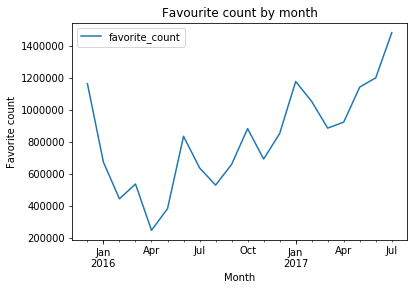

In [151]:
# Now that we have our input data, we will create a plot including adding x and y axis labels plus a title
lineplot_pivot.plot(x='month', y='favorite_count', kind='line')
plt.xlabel('Month')
plt.ylabel('Favorite count')
plt.title('Favourite count by month')
plt.show()
# We can see that the start of the in scope window contained a high number of favorited tweets before this dropped off into early 2016
# Since April 2016 the popularity of the account / tweets has been steadily increasing

In [2]:
zip -r data.zip /

SyntaxError: invalid syntax (<ipython-input-2-47b0d4625c2e>, line 1)